## Week 3: Geospatial Data Analysis and GeoPandas

Sep 15, 2020

## Agenda for Week #3

- Vector data and introduction to GeoPandas
- Spatial relationships and joins
- Visualization for geospatial data
- Demo: 311 requests by neighborhood in Philadelphia
- Exercise: Property assessments by neighborhood

## Now, on to geospatial analysis...

In [1]:
# Let's setup the imports we'll need first
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

## Vector Data


- **Vector** refers to **discrete geometric entities**
- The [Open Geospatial Consortium](https://en.wikipedia.org/wiki/Open_Geospatial_Consortium) has standardized a set of [**simple features**](https://en.wikipedia.org/wiki/Simple_Features)
- Includes points, lines, and polygons

<center>
    <img src=attachment:points-lines-polygons-vector-data-types.png width=600></img>
</center>

[Source](https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/)

## A couple of terminology notes

- A **feature** refers to both the geometry and attributes of specific piece of vector data
- A **feature collection** is a list, or collection, of features

Both terms are very common in Python geospatial software.

## Common formats for vector datasets

## A shapefile

Actually several files with the same common prefix

Mandatory files:

- **.shp**: the file containing the geometries
- **.shx**: the file that indexes the geometry
- **.dbf**: tabular data format storing the attributes for each geometry
    
And many optional files for documentation, projection information, etc.

Let's take a look at an example shapefile:

We'll use the `ls` command to *list* out all of the files in an example shapefile in the `data/` folder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%ls "/content/drive/MyDrive/courses/geospatialdatascience/MUSA/lecture3/data/ne_110m_admin_0_countries"

ne_110m_admin_0_countries.cpg  ne_110m_admin_0_countries.prj  ne_110m_admin_0_countries.shx
ne_110m_admin_0_countries.dbf  ne_110m_admin_0_countries.shp


## The GeoJSON file

- Stores simple features in a JSON format
- Arose due to the prevalence of the JSON format, especially on the web

<center>
    <img src=attachment:Screen%20Shot%202019-02-04%20at%2011.09.38%20PM.png width=600></img>
</center>

### Additional GeoJSON resources and tools:
- GitHub lets you view GeoJSON files natively
- http://geojson.io provides interactive creation and viewing of small GeoJSON files

GitHub example from the `data/` directory: [Philadelphia ZIP Codes](https://github.com/MUSA-550-Fall-2020/week-3/blob/master/data/Zipcodes_Poly.geojson)

## Working with vector data in Python: GeoPandas

`geopandas` provides a simple, intuitive for the main types of geospatial vector file formats

![EgXiUhLWAAQcYCM.jpeg](attachment:EgXiUhLWAAQcYCM.jpeg)

**Example:** Let's load a shape file of countries in the world...

[Source: Natural Earth Data](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/)

In [4]:
import geopandas as gpd

We can use the [read_file()](https://geopandas.org/reference/geopandas.read_file.html) function to read shapefiles and GeoJSON files.

In [5]:
# Read the shape file, giving the name of the directory
countries = gpd.read_file("/content/drive/MyDrive/courses/geospatialdatascience/MUSA/lecture3/data/ne_110m_admin_0_countries")

In [ ]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [6]:
type(countries)

geopandas.geodataframe.GeoDataFrame

## What's a `GeoDataFrame`?

Just like a `DataFrame` but with a `geometry` column

In [7]:
# Print out the first 10 entires of the "geometry" column
countries.geometry.head(n=10)

0    POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1    MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2    POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3    POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4    MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
5    POLYGON ((43.58275 41.09214, 44.97248 41.24813...
6    MULTIPOLYGON (((-59.57209 -80.04018, -59.86585...
7    POLYGON ((68.93500 -48.62500, 69.58000 -48.940...
8    MULTIPOLYGON (((145.39798 -40.79255, 146.36412...
9    POLYGON ((16.97967 48.12350, 16.90375 47.71487...
Name: geometry, dtype: geometry

## We can still leverage the power of `pandas`...

Calculate the total world population:

In [8]:
countries['pop_est'].sum()/1e9 # In billions

7.383089462

Calculate the total population on each continent:

In [9]:
grouped = countries.groupby('continent')
grouped

<div class="alert alert-info" style="font-size:100%">
<b>REMEMBER</b>: <br>
    Remember: the <code>groupby()</code> does not return a <code>DataFrame</code> — you need to call <code>sum()</code>, <code>mean()</code>, etc, or <code>apply()</code> a function.
</div>

In [10]:
# Sum population on each continent
pop_by_continent = grouped['pop_est'].sum()

# Sort values
pop_by_continent.sort_values(ascending=False, inplace=True)

# Output sorted values from cell
pop_by_continent

continent
Asia                       4.389145e+09
Africa                     1.219176e+09
Europe                     7.463985e+08
North America              5.730421e+08
South America              4.185407e+08
Oceania                    3.678284e+07
Antarctica                 4.050000e+03
Seven seas (open ocean)    1.400000e+02
Name: pop_est, dtype: float64

Filter the data frame based on a boolean selection:

In [11]:
# Is the country name USA?
is_USA = countries['name']=='United States of America'

# Get the row with USA
USA = countries.loc[is_USA]

USA

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
168,USA,United States of America,North America,326625791.0,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## An aside: the `squeeze()` function

It does just one it sounds like: if you have a DataFrame with only one row, it will "squeeze" the row dimension by removing it, returning just a Series object:

In [12]:
# Squeeze
USA = USA.squeeze()

# Print out the type
print("The type of USA is: ", type(USA))

# Output
USA

The type of USA is:  <class 'pandas.core.series.Series'>


iso_a3                                                      USA
name                                   United States of America
continent                                         North America
pop_est                                             326625791.0
gdp_md_est                                           18560000.0
geometry      MULTIPOLYGON (((-122.84000000000005 49.0000000...
Name: 168, dtype: object

The simple features (Lines, Points, Polygons) are implemented by the [shapely](https://shapely.readthedocs.io/en/stable/manual.html) library

In [13]:
type(USA.geometry)

shapely.geometry.multipolygon.MultiPolygon

Jupyter notebook renders `shapely` geometries automatically:

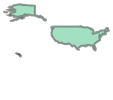

In [14]:
# a mini USA
USA.geometry

## How does `geopandas` handle coordinate systems and map projections?



## Coordinate Reference Systems

A **coordinate reference system** (CRS) relates the position of a geometry object on the spherical earth to its two-dimensional coordinates.

A `GeoDataFrame` or `GeoSeries` has a `.crs` attribute which specifies the coordinate reference system.

In [15]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

- EPSG 4326 is known as WGS 84 where `x` and `y` are longitude and latitude.
- It is is the default coordinate system for GPS systems.
- It's also known as Plate Carrée

## How to plot all of the geometries at once?

Use the `plot()` function to get a quick and dirty plot of all of the geometry features.

**Note:** the `plot()` returns the current maplotlib axes, allowing you to format the chart after plotting.

Text(0.5, 1.0, 'Equirectangular Projection')

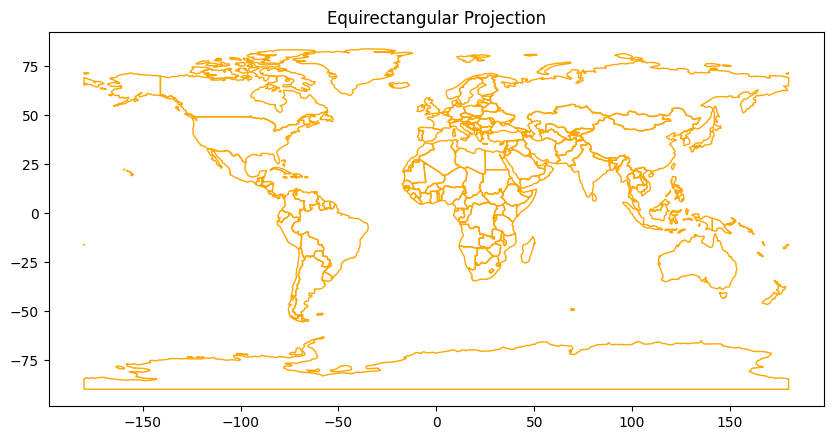

In [16]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the countries on our axes
ax = countries.plot(ax=ax, facecolor="none", edgecolor="orange")

# Add a title
ax.set_title("Equirectangular Projection")

<center>
    <img src=attachment:platecarree.png width=700></img>
</center>

## What's going on under the hood?

`matplotlib` and `cartopy` are combined to make geo-aware plots

In [18]:
import cartopy.crs as ccrs

ModuleNotFoundError: No module named 'cartopy'

In [17]:
# Initialize the EPSG:4326 CRS object
wgs84 = ccrs.PlateCarree()

# Create a geo-aware axes using the "projetion" keyword
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": wgs84})

# Print out the type of the axes for info purposes
print("The type of the axes is: ", type(ax))

# Add the geometry shapes
ax.add_geometries(countries["geometry"], crs=wgs84, facecolor="none", edgecolor="black")

# Add a title
ax.set_title("Equirectangular Projection");

NameError: name 'ccrs' is not defined

See the Geopandas documentation for more examples: [Plotting with CartoPy and GeoPandas](https://geopandas.org/gallery/cartopy_convert.html)

## Can we convert to other geometries?

Use the `to_crs()` function. The most well-known projections can be specified by their EPSG code.

Geopandas documentation on re-projecting: [Managing Projections](https://geopandas.org/projections.html#re-projecting)

## Let's convert to the Mercator projection

[EPSG code: 3395](http://spatialreference.org/ref/epsg/wgs-84-world-mercator/)

In [19]:
# Remove Antartica, as the Mercator projection
# cannot deal with the poles
no_antartica = countries[(countries['name'] != "Antarctica")]

In [20]:
# Two ways to specify the EPSG code
countries_mercator = no_antartica.to_crs(epsg=3395)

# Alternatively:
# countries_mercator = no_antartica.to_crs("EPSG:3395")

In [21]:
no_antartica.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [22]:
countries_mercator.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((6813956.990 4227673.562, 6927484.435..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((2660998.216 -1305442.810, 2680..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((2339940.185 4961221.199, 2337708.178..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((5741805.754 2765811.385, 5761611.935..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-7453944.198 -7306880.704, -75..."


**Note:** the magnitude of the values in the geometry column changed! A quick and easy way to tell if the re-projection worked properly!

## Now let's plot it

The easy way...with geopandas built-in `plot()` function

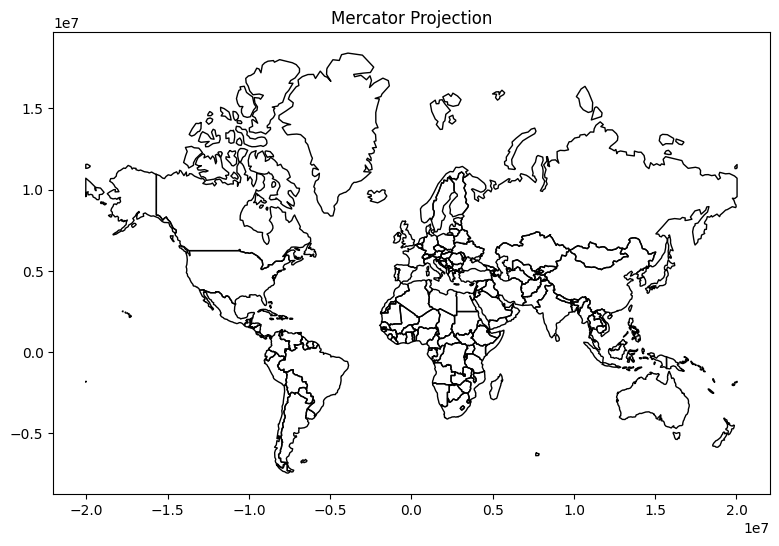

In [23]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Use built-in plot() of the GeoDataFrame
ax = countries_mercator.plot(ax=ax, facecolor="none",
                             edgecolor="black")

# Add a title
ax.set_title("Mercator Projection");

## The harder way...

With cartopy and matplotlib

In [ ]:
# Initialize the CRS object
crs = ccrs.epsg(3395) # or crs = ccrs.Mercator()

# Create a geo-aware axes using the "projetion" keyword
fig, ax = plt.subplots(figsize=(10, 6),
                       subplot_kw={"projection": crs})

# Add the geometry shapes
ax.add_geometries(countries_mercator['geometry'],
                  crs=crs, facecolor='none', edgecolor='black')

# Add a title
ax.set_title('Mercator Projection');

<center>
    <img src=attachment:mercator.png width=500></img>
</center>

## When to use the 'harder' way?

When you need more customizable, advanced plots.

Nearly anything that `matplotlib` can do can be plotted on a `cartopy` `GeoAxes`. Plotting directly with `matplotlib` allows you to take full advantage of `matplotlib`'s functionality.

## So which CRS is best?

- For city-based data, usually Web Mercator ([EPSG=3857](https://epsg.io/3857)) is best
- Can also use a CRS specific to individual states, e.g., [PA State Plane EPSG=2272](https://epsg.io/2272)

## Let's load the city limits for Philadelphia

We'll use the provided `City_Limits` shape file in the `data/` folder

In [25]:
%ls '/content/drive/MyDrive/courses/geospatialdatascience/MUSA/lecture3/data/City_Limits'

City_Limits.cpg  City_Limits.dbf  City_Limits.prj  City_Limits.shp  City_Limits.shx


In [26]:
city_limits = gpd.read_file('/content/drive/MyDrive/courses/geospatialdatascience/MUSA/lecture3/data/City_Limits')

city_limits

,OBJECTID,Shape__Are,Shape__Len,geometry
0,1,0.038911,1.259687,"POLYGON ((-75.01497 40.13793, -75.01456 40.137..."


## What's the CRS?

Use the `.crs` attribute to find out!

In [27]:
city_limits.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

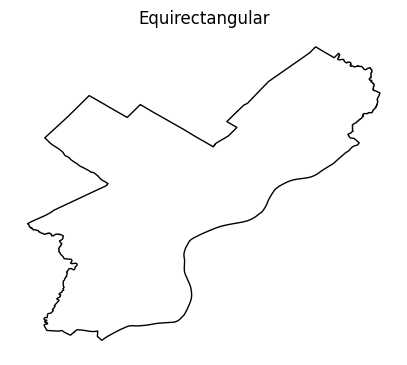

In [28]:
# Create our figure and axes
fig, ax = plt.subplots(figsize=(5, 5))

# Plot
city_limits.plot(ax=ax, facecolor="none", edgecolor="black")

# Format
ax.set_title("Equirectangular")
ax.set_axis_off() # This will remove the axes completely
ax.set_aspect("equal") # This forces an equal aspect ratio

This is *not* what Philadelphia looks like..

Let's try EPSG=3857 instead:

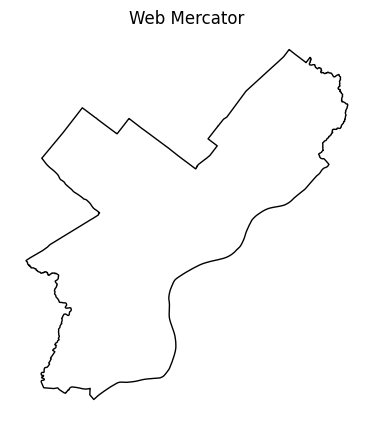

In [29]:
# Create the figure
fig, ax = plt.subplots(figsize=(5, 5))

# Convert to EPSG:3857
city_limits_3857 = city_limits.to_crs(epsg=3857)

# Plot and format
city_limits_3857.plot(ax=ax, facecolor="none", edgecolor="black")

ax.set_title("Web Mercator")
ax.set_axis_off()
ax.set_aspect("equal");

**Important:** the equirectangular CRS (EPSG=4326) is often used by default and will make cities appear wider and flatter than they really are

## Saving GeoDataFrames


Use the `to_file()` function and specify the driver.

In [30]:
# ESRI shape file
city_limits_3857.to_file("/content/drive/MyDrive/courses/geospatialdatascience/MUSA/lecture3/data/city_limits_3857",
                         driver='ESRI Shapefile')

In [31]:
# GeoJSON is also an option
city_limits_3857.to_file("/content/drive/MyDrive/courses/geospatialdatascience/MUSA/lecture3/data/city_limits_3857.geojson",
                         driver='GeoJSON')

## How about as a CSV file?

Yes, but reading requires more work...

In [32]:
# save a csv file
city_limits_3857.to_csv("/content/drive/MyDrive/courses/geospatialdatascience/MUSA/lecture3/data/city_limits_3857.csv", index=False)

In [33]:
df = pd.read_csv("/content/drive/MyDrive/courses/geospatialdatascience/MUSA/lecture3/data/city_limits_3857.csv")
df.head()

,OBJECTID,Shape__Are,Shape__Len,geometry
0,1,0.038911,1.259687,"POLYGON ((-8350627.97509646 4886006.88680784, ..."


In [ ]:
type(df)

pandas.core.frame.DataFrame

## Looks similar...

**But,** the "geometry" column is just stored as a string...it's not a shapely Polygon

In [34]:
type(df.geometry.iloc[0])

str

## Use `shapely` to parse the string version of the polygons

In [35]:
from shapely import wkt

# wkt.loads will convert from string to Polygon object
df['geometry'] = df['geometry'].apply(wkt.loads)

In [36]:
type(df.geometry.iloc[0])

shapely.geometry.polygon.Polygon

## Converting from a DataFrame to a GeoDataFrame

We can initialize the GeoDataFrame directly from a DataFrame but we need to specify **two things**:

1. The name of the "geometry" column
2. The CRS of the "geometry" column

In this case, the geometry column was saved in Web Mercator EPSG=3857

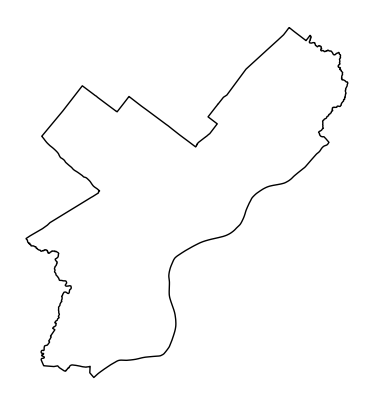

In [37]:
# Make specifying the name of the geometry column and CRS
gdf= gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:3857")

# Now plot
fig, ax = plt.subplots(figsize=(5,5))
ax = gdf.plot(ax=ax, facecolor='none', edgecolor='black')
ax.set_axis_off()
ax.set_aspect("equal")

## Let's convert back to 4326 and plot

The tilt should be a bit more obvious now...

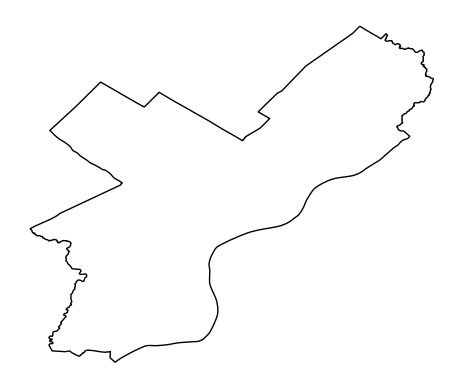

In [38]:
ax = gdf.to_crs(epsg=4326).plot(facecolor='none', edgecolor='black')

ax.set_axis_off()
ax.set_aspect("equal")

### Note

- I didn't use `plt.subplots()` here to create a figure/axes – I let geopandas automatically make one
- I've chained together the `to_crs()` and `.plot()` functions in one line
- The `.plot()` function returns the axes object that geopandas used to plot — this lets you customizes the axes after plotting

## So, when should you use GeoPandas?

- For exploratory data analysis and visualization, including in Jupyter notebooks
- Pre-processing data to be fed into a desktop GIS program
- For compact, readable, and reproducible code
- If you’re comfortable with Pandas and/or R data frames.

## When it may not be the best tool:

- For polished multilayer map creation — one option is to use a desktop GIS like QGIS.
- If you need very high performance — geopandas can be slow compared to other GIS software.

## Spatial Relationships and Joins

In [39]:
# Load some cities data
cities = gpd.read_file("/content/drive/MyDrive/courses/geospatialdatascience/MUSA/lecture3/data/ne_110m_populated_places")

In [40]:
cities.head(1)

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)


<center>
    <img src=attachment:TopologicSpatialRelarions2.png width=600></img>
</center>

(Image by [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))

All of these operations are available as functions of a `GeoDataFrame`.

## A quick example

What country is New York in?

**Spoiler**: the USA

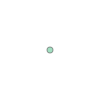

In [41]:
# Select the Point representing New York City
new_york = cities.loc[cities['name'] == 'New York', 'geometry'].squeeze()
new_york

In [42]:
type(new_york)

shapely.geometry.point.Point

In [43]:
countries.contains(new_york)

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Length: 177, dtype: bool

In [44]:
# Find the country that contains New York
countries.loc[countries.contains(new_york)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
168,USA,United States of America,North America,326625791.0,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


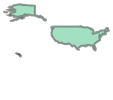

In [45]:
# Get the geometry column of the country containing NYC
USA = countries.loc[countries.contains(new_york), 'geometry'].squeeze()
USA

### Note

The `.loc[]` function can take the index selector as the first argument, and the name of a column as a second argument (separated by a comma)

In [46]:
type(USA)

shapely.geometry.multipolygon.MultiPolygon

In [47]:
# Is New York within the USA?
new_york.within(USA)

True

### Reference

The different functions for checking spatial relationships:

- `equals`
- `contains`
- `crosses`
- `disjoint`
- `intersects`

- `overlaps`
- `touches`
- `within`
- `covers`

See [the shapely documentation](https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships) for an overview of these methods.

## The spatial join


**SPATIAL JOIN** = merging attributes from two geometry layers based on their spatial relationship

Different parts of this operations:

- The GeoDataFrame to which we want add information
- The GeoDataFrame that contains the information we want to add
- The spatial relationship we want to use to match both datasets (**intersects**, **contains**, **within**)
- The type of join: **left** or **inner** join

In this case, we want to join the `cities` dataframe, containing `Point` geometries, with the information of the `countries` dataframe, containing `Polygon` geometries.

To match cities with countries, we'll use the `within` spatial relationship.

The [`geopandas.sjoin()`](https://geopandas.org/reference/geopandas.sjoin.html) function performs this operation:

In [48]:
countries.head(1)

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."


In [49]:
joined = gpd.sjoin(cities, countries, op='within', how='left')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
type(joined)

geopandas.geodataframe.GeoDataFrame

In [50]:
joined.head()

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
0,Vatican City,POINT (12.45339 41.90328),79.0,ITA,Italy,Europe,62137802.0,2221000.0
1,San Marino,POINT (12.44177 43.93610),79.0,ITA,Italy,Europe,62137802.0,2221000.0
2,Vaduz,POINT (9.51667 47.13372),9.0,AUT,Austria,Europe,8754413.0,416600.0
3,Lobamba,POINT (31.20000 -26.46667),152.0,SWZ,Swaziland,Africa,1467152.0,11060.0
4,Luxembourg,POINT (6.13000 49.61166),97.0,LUX,Luxembourg,Europe,594130.0,58740.0


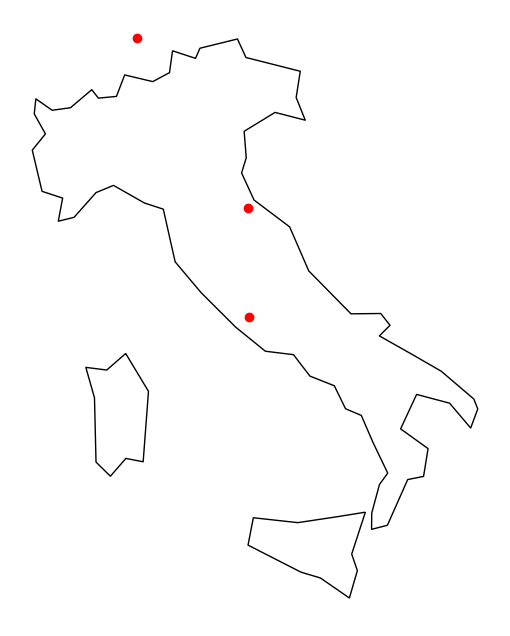

In [52]:
# Extract Italy
italy = countries.loc[countries['name']=='Italy']

# Plot
fig, ax = plt.subplots(figsize=(8,8))
italy.plot(ax=ax, facecolor='none', edgecolor='black')
ax.set_axis_off()
ax.set_aspect("equal")

# Plot the first city in the joined data frame ( City)
# Use the same axes by passing in the ax=ax keyword
ax = joined.iloc[:3].plot(ax=ax, color='red')

## Spatial overlay operation

We can also perform the `join()` operation on the **geometries** rather than just combining **attributes**.

The `overlay()` function combines geometries, e.g. by taking the intersection of the geometries.

In [53]:
africa = countries[countries['continent'] == 'Africa']

In [54]:
type(africa)

geopandas.geodataframe.GeoDataFrame

In [55]:
## What crs?
africa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [56]:
# Let's transform to a CRS that uses meters
# instead of degrees (EPSG=3857)
africa = africa.to_crs(epsg=3857)

africa.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

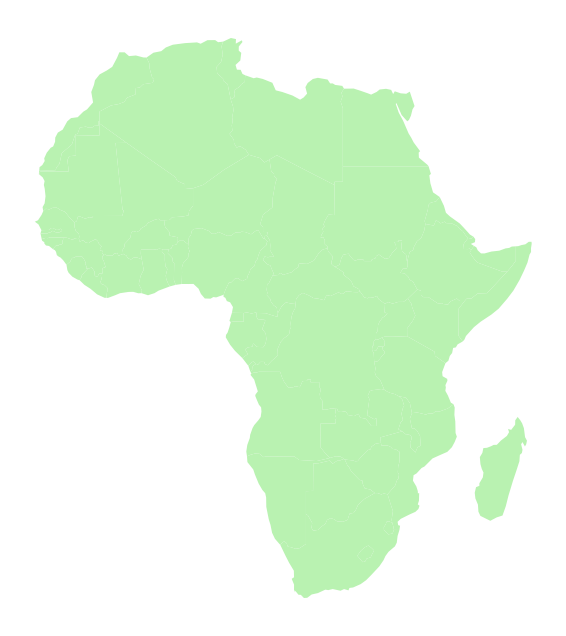

In [57]:
fig, ax = plt.subplots(figsize=(8,8))

africa.plot(ax=ax, facecolor='#b9f2b1')

ax.set_axis_off()
ax.set_aspect("equal")

In [58]:
# Important CRS needs to match!
cities = cities.to_crs(epsg=3857)

In [59]:
# Create a copy of the GeoDataFrame
buffered_cities = cities.copy()

# Add a buffer region of 250 km around all cities
buffered_cities['geometry'] = buffered_cities.buffer(250e3)

## Plot the difference of the two geometries

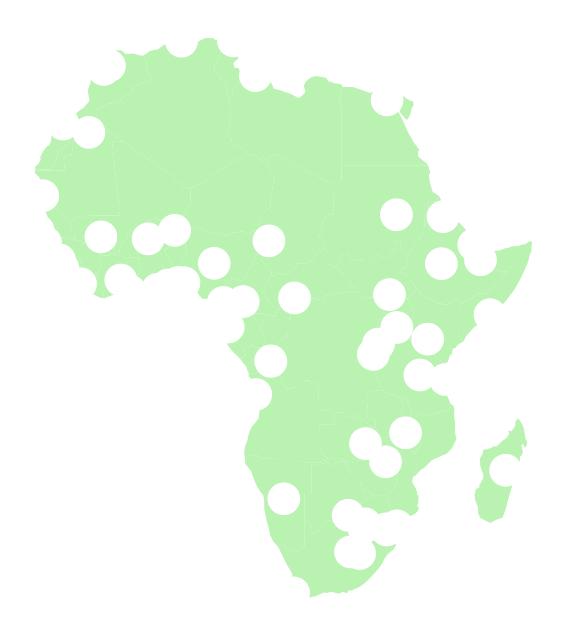

In [60]:
fig, ax = plt.subplots(figsize=(8, 8))

# Calculate the difference of the geometry sets
diff = gpd.overlay(africa, buffered_cities, how='difference')

# Plot
diff.plot(facecolor="#b9f2b1", ax=ax)
ax.set_axis_off()
ax.set_aspect("equal")

In [61]:
# Data attributes are the same as the first data frame (africa)
# with an updated geometry column
diff.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((2673464.087 -1449571.330, 2441..."
1,BEN,Benin,Africa,11038805.0,24310.0,"POLYGON ((100138.898 1231805.081, 138422.412 1..."
2,BFA,Burkina Faso,Africa,20107509.0,32990.0,"MULTIPOLYGON (((100138.898 1231805.081, 26368...."
3,BWA,Botswana,Africa,2214858.0,35900.0,"POLYGON ((3065120.801 -2659823.621, 3061281.52..."
4,CAF,Central African Rep.,Africa,5625118.0,3206.0,"POLYGON ((1792937.514 836963.765, 1813457.017 ..."


## Plot the intersection of the two geometries

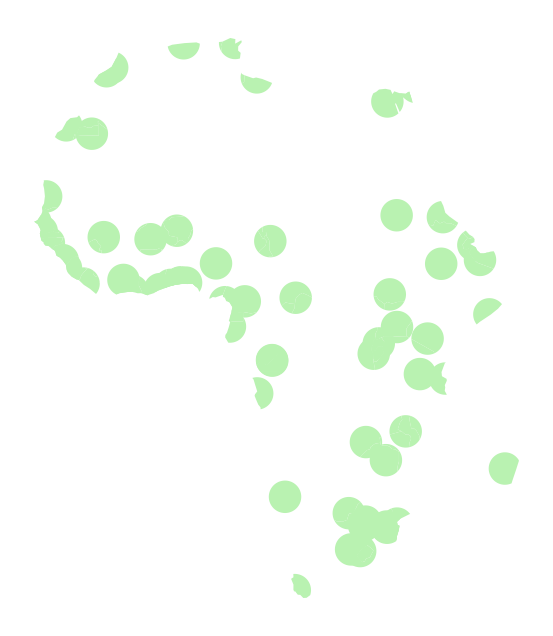

In [62]:
fig, ax = plt.subplots(figsize=(8, 8))

# The intersection of the geometry sets
intersection = gpd.overlay(africa, buffered_cities, how='intersection')

# Plot
intersection.plot(ax=ax, facecolor="#b9f2b1")
ax.set_axis_off()
ax.set_aspect("equal")

## Recap:

- **Spatial join**: merge attributes from one data frame to another based on the spatial relationship
- **Spatial overlay**: creating new geometries based on spatial operation between both data frames (and not combining attributes of both data frames)

## Putting it all together: 311 requests in 2020

Load 311 requests in Philadelphia from the `data/` directory.

Source: [OpenDataPhilly](https://www.opendataphilly.org/dataset/311-service-and-information-requests)

In [63]:
# Load the data from a CSV file into a pandas DataFrame
requests = pd.read_csv('/content/drive/MyDrive/courses/geospatialdatascience/MUSA/lecture3/data/public_cases_fc_2020.csv')

<ipython-input-63-ff06e99ca2f5>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  requests = pd.read_csv('/content/drive/MyDrive/courses/geospatialdatascience/MUSA/lecture3/data/public_cases_fc_2020.csv')


In [64]:
print("number of requests = ", len(requests))

number of requests =  562549


In [65]:
requests.head()

,objectid,service_request_id,status,status_notes,service_name,service_code,agency_responsible,service_notice,requested_datetime,updated_datetime,expected_datetime,address,zipcode,media_url,lat,lon
0,7890359,13127945,Closed,Question Answered,Information Request,SR-IR01,Police Department,NaN,2020-02-05,2020-02-05,2020-02-05,NaN,NaN,NaN,NaN,NaN
1,8433329,13376073,Closed,NaN,Information Request,SR-IR01,License & Inspections,NaN,2020-05-22,2020-05-22,2020-05-22,NaN,NaN,NaN,NaN,NaN
2,8421006,13370944,Open,NaN,Abandoned Vehicle,SR-PD01,Police Department,60 Business Days,2020-05-20,2020-05-20,2020-08-20,1826 PENNINGTON RD,NaN,NaN,39.977058,-75.270591
3,8433331,13376078,Closed,NaN,Information Request,SR-IR01,Streets Department,NaN,2020-05-22,2020-05-22,2020-05-22,NaN,NaN,NaN,NaN,NaN
4,8288384,13325114,Closed,Question Answered,Information Request,SR-IR01,Department of Records,NaN,2020-04-30,2020-04-30,2020-04-30,NaN,NaN,NaN,NaN,NaN


## First, convert to a GeoDataFrame

Remove the requests missing lat/lon coordinates

In [66]:
requests = requests.dropna(subset=['lat', 'lon'])

Create Point objects for each `lat` and `lon` combination.

We can use the helper utility function: [`geopandas.points_from_xy()`](https://geopandas.org/reference/geopandas.points_from_xy.html#geopandas.points_from_xy)

In [67]:
requests['Coordinates'] = gpd.points_from_xy(requests['lon'], requests['lat'])

In [68]:
requests['Coordinates'].head()

2     POINT (-75.27059 39.97706)
9     POINT (-75.24549 39.92376)
14    POINT (-75.16257 40.04816)
19    POINT (-75.18500 40.03733)
22    POINT (-75.20961 39.94040)
Name: Coordinates, dtype: geometry

In [69]:
requests.head(2)

,objectid,service_request_id,status,status_notes,service_name,service_code,agency_responsible,service_notice,requested_datetime,updated_datetime,expected_datetime,address,zipcode,media_url,lat,lon,Coordinates
2,8421006,13370944,Open,NaN,Abandoned Vehicle,SR-PD01,Police Department,60 Business Days,2020-05-20,2020-05-20,2020-08-20,1826 PENNINGTON RD,NaN,NaN,39.977058,-75.270591,POINT (-75.27059 39.97706)
9,8161897,13218491,Open,NaN,Street Defect,SR-ST01,Streets Department,46 Business Days,2020-03-11,2020-04-01,2020-05-20,7000 CHESTER AVE,NaN,NaN,39.923762,-75.245485,POINT (-75.24549 39.92376)


Now, convert to a GeoDataFrame.

**Important**
- Don't forget to set the CRS manually!
- **The CRS you specify when creating a GeoDataFrame should tell geopandas what the coordinate system the input data is in.**
- Usually you will be reading lat/lng coordinates, and will need to specify the crs as EPSG code 4326
- You should specify the crs as a string using the syntax: `ESPG:4326`



Since we're only using a few EPSG codes in this course, you can usually tell what the CRS is by looking at the values in the Point() objects.

Philadelphia has a latitude of about 40 deg and longitude of about -75 deg.

Our data must be in the usual lat/lng EPSG=4326.

![Screen%20Shot%202020-09-12%20at%204.15.11%20PM.png](attachment:Screen%20Shot%202020-09-12%20at%204.15.11%20PM.png)

In [70]:
requests = gpd.GeoDataFrame(requests, geometry="Coordinates", crs="EPSG:4326")

## Next, identify the top 20 most common requests

Group by the service name and calculate the size of each group:

In [71]:
service_types = requests.groupby('service_name').size()

Sort by the number (in descending order):

In [72]:
service_types = service_types.sort_values(ascending=False)

Slice the data to take the first 20 elements:

In [73]:
top20 = service_types.iloc[:20]
top20

service_name
Rubbish/Recyclable Material Collection    40776
Illegal Dumping                           19246
Maintenance Complaint                     17969
Abandoned Vehicle                         15933
Information Request                       15240
Graffiti Removal                          11652
Street Light Outage                       10107
Street Defect                              7370
Fire Safety Complaint                      4874
Street Trees                               4450
Sanitation / Dumpster Violation            4244
Construction Complaints                    3859
Agency Receivables                         3451
Maintenance Residential or Commercial      3389
Other (Streets)                            2922
LI Escalation                              2807
Parks and Rec Safety and Maintenance       2228
Traffic Signal Emergency                   2157
Complaint (Streets)                        2100
Alley Light Outage                         1650
dtype: int64

## Let's trim to only the trash-related requests

In [74]:
trash_requests = requests.loc[
    requests["service_name"] == "Rubbish/Recyclable Material Collection"
]

print("The nuumber of trash-related requests = ", len(trash_requests))

The nuumber of trash-related requests =  40776


## Trash collection has been a **BIG** issue in Philadelphia recently


See for example, [this article](https://www.inquirer.com/news/philadephia-trash-recycling-collection-delays-covid-20200806.html) in the Philadelphia Inquirer

## Let's plot the monthly totals for 2020

In [75]:
# Convert the requested datetime to a column of Datetime objects
trash_requests['requested_datetime'] = pd.to_datetime(trash_requests['requested_datetime'])

# Use the .dt attribute to extract out the month name
trash_requests['month'] = trash_requests['requested_datetime'].dt.month_name()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [76]:
totals_by_week = trash_requests.groupby("month", as_index=False).size()

totals_by_week.head()

,month,size
0,April,5773
1,August,4414
2,February,2067
3,January,2710
4,July,9622


### Note: I've used the `as_index=False` syntax here

This will force the size() function to return a DataFrame instead of having the `month` column as the index of the resulted groupby operation.

It saves us from having to do the `.reset_index()` function call after running the `.size()` function.

## Plot a bar chart with seaborn

For making static bar charts with Python, seaborn's [`sns.barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) is the best option

In [77]:
import seaborn as sns

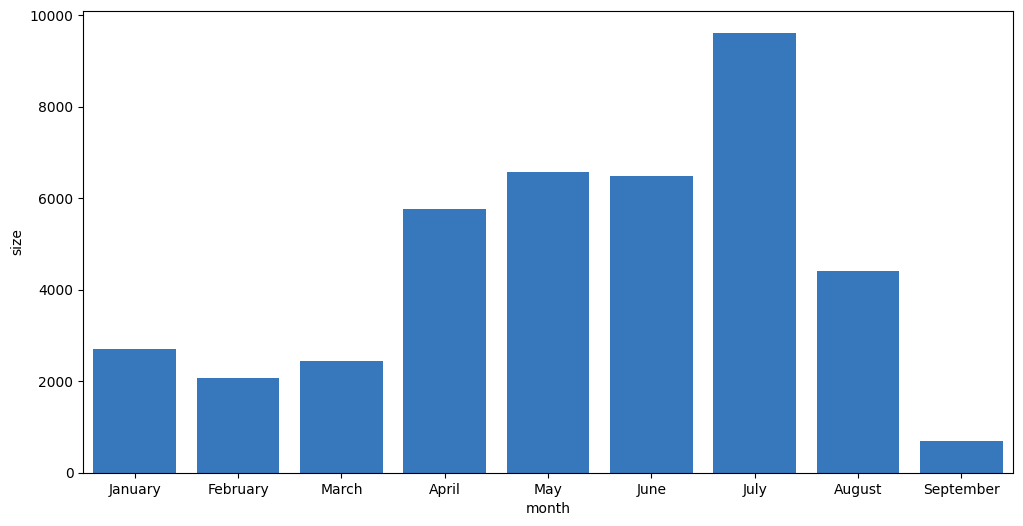

In [78]:
# Initialize figure/axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot!
sns.barplot(
    x="month",
    y="size",
    data=totals_by_week,
    color="#2176d2",
    ax=ax,
    order=["January", "February", "March", "April", "May", "June", "July", "August", "September"],
);

## Example: Improving the aesthetics of matplotlib

The trend is clear in the previous chart, but can we do a better job with the aesthetics? Yes!

For reference, here is a common way to clean up charts in matplotlib:

In [ ]:
# Initialize figure/axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot!
sns.barplot(
    x="month",
    y="size",
    data=totals_by_week,
    color="#2176d2",
    ax=ax,
    order=["January", "February", "March", "April", "May", "June", "July", "August", "September"],
    zorder=999 # Make sure the bar charts are on top of the grid
)

# Remove x/y axis labels
ax.set_xlabel("")
ax.set_ylabel("")

# Format the ytick labels to use a comma and no decimal places
ax.set_yticklabels([f"{yval:,.0f}" for yval in ax.get_yticks()] )

# Add a grid backgrou d
ax.grid(True, axis='y')

# Remove the top and right axes lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a title
ax.set_title("Philadelphia's Trash-Related 311 Requests in 2020", weight='bold', fontsize=16);